In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(*args, **kwargs):
    filename = ('data/' + '_'.join(kwargs['ticker']) + '__' +
                kwargs['date']['lte'] + '_' + kwargs['date']['gte'] + '.pickle')
    try:
        data = pd.read_pickle(filename)
        print('loaded data from file', filename)
        return data
    except:
        data = quandl.get_table(*args, **kwargs)
        data.to_pickle(filename)
        print('saved downloaded data to file', filename)
        return data

In [2]:
quandl.ApiConfig.api_key = 'TnAFSA_n9XEx3soHZZZw'
ticker = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = get_data('WIKI/PRICES', ticker = ticker,
                                qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                                date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)
data = data.set_index('date')
prices = data.pivot(columns='ticker')
prices.head()

loaded data from file data/CNP_F_WMT_GE_TSLA__2016-12-31_2014-1-1.pickle


adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2014-01-02  19.116238  12.726742  24.266002  150.10  71.343743
2014-01-03  19.107861  12.784441  24.248354  149.56  71.108673
2014-01-06  19.132992  12.842140  24.054226  147.00  70.710863
2014-01-07  19.334039  12.677286  24.080698  149.36  70.927850
2014-01-08  19.132992  12.809169  24.010106  151.28  70.367299

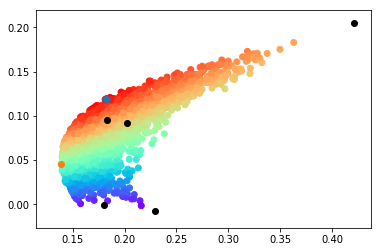

In [10]:
workdays_in_year = 250
covs = prices.pct_change().cov() * workdays_in_year
rets = prices.pct_change().mean() * workdays_in_year

num_portfolios = 3000
weights = np.random.dirichlet(np.ones(len(covs.columns)), size=(num_portfolios))
volatilities = (weights.dot(covs) * weights).sum(-1) ** 0.5
returns = weights.dot(rets)
sharpes = returns / volatilities


plt.scatter(volatilities, returns, c=sharpes, cmap='rainbow')
plt.scatter(np.diag(covs.values) ** 0.5, rets, c='black')

index_max_sharpe = sharpes.argmax()
index_min_volatility = volatilities.argmin()
plt.scatter(volatilities[index_max_sharpe], returns[index_max_sharpe], marker='D')
plt.scatter(volatilities[index_min_volatility], returns[index_min_volatility])

AttributeError: 'numpy.ndarray' object has no attribute 'max_index'